In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn.tree import _tree


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_Abandon_Scolaire.csv to Dataset_Abandon_Scolaire.csv


In [3]:
df = pd.read_csv('Dataset_Abandon_Scolaire.csv')

In [4]:
df

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0
...,...,...,...,...,...,...,...
1995,23,Femme,81.800974,3,12.496245,Marié,0
1996,20,Homme,84.082873,4,13.125663,Célibataire,0
1997,19,Femme,87.114146,1,13.841282,Célibataire,0
1998,20,Femme,83.799064,3,12.061256,Célibataire,0


In [5]:
# 2. Vérifier les dimensions du jeu de données
print("Dimensions du jeu de données :")
print(f"Nombre de lignes (étudiants) : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}\n")

# 3. Aperçu rapide des premières lignes
print("Aperçu des 5 premières lignes :")
print(df.head(), '\n')

# 4. Types de variables
print("Types de variables :")
print(df.dtypes, '\n')

# 5. Statistiques descriptives pour les variables numériques
print("Statistiques descriptives des variables numériques :")
print(df.describe(), '\n')



Dimensions du jeu de données :
Nombre de lignes (étudiants) : 2000
Nombre de colonnes : 7

Aperçu des 5 premières lignes :
   Age   Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
0   21  Femme      89.585023               2     15.826896   
1   20  Homme      70.713068               3     12.829358   
2   22  Femme      82.122963               1     13.086319   
3   24  Homme      87.408859               3     14.992032   
4   20  Homme      86.470676               3     12.671649   

  Situation_familiale  Abandon  
0    Enfants à charge        0  
1         Célibataire        0  
2    Enfants à charge        0  
3         Célibataire        0  
4               Marié        0   

Types de variables :
Age                      int64
Sexe                    object
Taux_presence          float64
Nombre_retards           int64
Note_moyenne           float64
Situation_familiale     object
Abandon                  int64
dtype: object 

Statistiques descriptives des variables numériques

Statistiques descriptives des variables catégorielles :
         Sexe Situation_familiale
count    2000                2000
unique      2                   4
top     Homme         Célibataire
freq     1011                1014 

Présence de valeurs manquantes par colonne :
Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64 

Valeurs minimales et maximales par variable numérique :
Age -> min: 14, max: 28
Taux_presence -> min: 59.58636949443199, max: 100.0
Nombre_retards -> min: 0, max: 9
Note_moyenne -> min: 7.615012225388506, max: 18.833573660166568

Répartition des modalités (valeurs uniques) :
Sexe
Homme    1011
Femme     989
Name: count, dtype: int64
Situation_familiale
Célibataire         1014
Marié                571
Enfants à charge     302
Divorcé              113
Name: count, dtype: int64
Abandon
0    1832
1     168
Name: count, dtype: int64


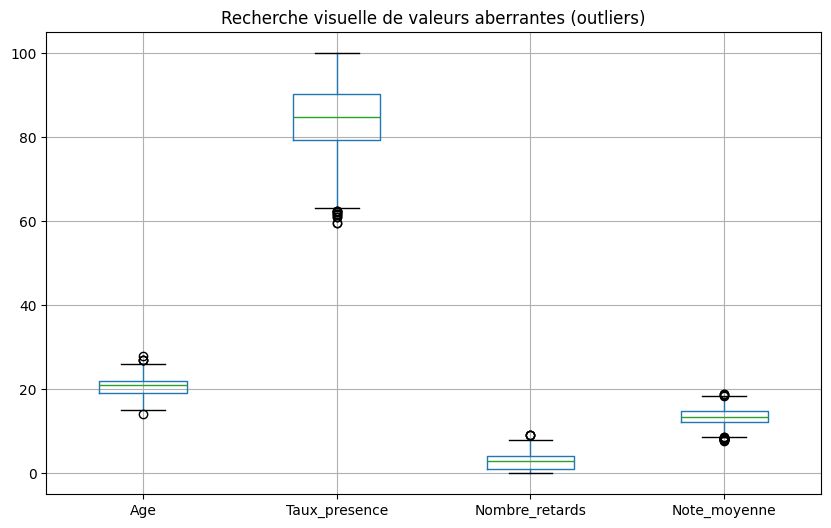

In [6]:
# 6. Statistiques descriptives pour les variables catégorielles
print("Statistiques descriptives des variables catégorielles :")
print(df.describe(include=['object']), '\n')

# 7. Présence de valeurs manquantes
print("Présence de valeurs manquantes par colonne :")
print(df.isnull().sum(), '\n')

# 8. Recherche de valeurs aberrantes simples
print("Valeurs minimales et maximales par variable numérique :")
for col in ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']:
    print(f"{col} -> min: {df[col].min()}, max: {df[col].max()}")

# 9. Distribution des modalités pour les variables catégorielles et la cible
print("\nRépartition des modalités (valeurs uniques) :")
print(df['Sexe'].value_counts())
print(df['Situation_familiale'].value_counts())
print(df['Abandon'].value_counts())

# 10. Visualiser rapidement les outliers
import matplotlib.pyplot as plt
df[['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']].boxplot(figsize=(10,6))
plt.title("Recherche visuelle de valeurs aberrantes (outliers)")
plt.show()

In [7]:
# Détection et gestion par la méthode IQR pour les variables numériques
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

num_cols = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']
for col in num_cols:
    df[col] = cap_outliers(df[col])



In [11]:
### 2. Gestion de la distribution des variables numériques ###
# Standardisation ou normalisation si besoin (ex : KNN, Régression logistique)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### 3. Encodage des variables catégorielles ###

# Encodage de 'Sexe' (binaire)
df['Sexe'] = df['Sexe'].map({'Homme': 0, 'Femme': 1})

# Encodage One-Hot pour 'Situation_familiale' (nominale, non ordinale)
df = pd.get_dummies(df, columns=['Situation_familiale'], drop_first=True)

### 4. Vérification finale de la structure ###
print("Aperçu du jeu de données prêt pour l'analyse/modélisation :")
print(df.head())

print("\nNouvelles dimensions :", df.shape)
print("\nTypes des variables :\n", df.dtypes)

### 5. Vérification de la distribution de la variable cible (déséquilibre de classe) ###
abandon_counts = df['Abandon'].value_counts(normalize=True)
print("\nDistribution de la variable cible 'Abandon' :")
print(abandon_counts)

Aperçu du jeu de données prêt pour l'analyse/modélisation :
       Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne  Abandon  \
0  0.20339     1       0.625641       -0.332052      1.326261        0   
1 -0.29481     0      -1.764861        0.228373     -0.342130        0   
2  0.70159     1      -0.319575       -0.892476     -0.199109        0   
3  1.69799     0       0.349988        0.228373      0.861586        0   
4 -0.29481     0       0.231148        0.228373     -0.429909        0   

   Situation_familiale_Divorcé  Situation_familiale_Enfants à charge  \
0                        False                                  True   
1                        False                                 False   
2                        False                                  True   
3                        False                                 False   
4                        False                                 False   

   Situation_familiale_Marié  
0                      False  


# **Explications:**

**Gestion des outliers :**
On applique un « clipping » (restriction des valeurs extrêmes) basé sur l’intervalle interquartile (IQR) pour limiter l’impact des valeurs atypiques.

Standardisation : **texte en gras**
Les variables numériques sont centrées-réduites (moyenne 0, écart-type 1) pour garantir une bonne comparabilité entre variables (essentiel pour certains modèles).

**Encodage des catégorielles :**

Le sexe est encodé binaire (0=Homme, 1=Femme).

La situation familiale est transformée en variables indicatrices (one-hot), avec la première modalité retirée pour éviter la colinéarité.

**Vérifications :**
Un aperçu du nouveau dataset et de ses types permet de valider la transformation.

**Distribution de la cible :**
On affiche la répartition pour rappeler le déséquilibre, à garder en tête pour l’évaluation.

In [15]:
df_clean = df.copy()
df_clean

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Abandon,Situation_familiale_Divorcé,Situation_familiale_Enfants à charge,Situation_familiale_Marié
0,0.20339,1,0.625641,-0.332052,1.326261,0,False,True,False
1,-0.29481,0,-1.764861,0.228373,-0.342130,0,False,False,False
2,0.70159,1,-0.319575,-0.892476,-0.199109,0,False,True,False
3,1.69799,0,0.349988,0.228373,0.861586,0,False,False,False
4,-0.29481,0,0.231148,0.228373,-0.429909,0,False,False,True
...,...,...,...,...,...,...,...,...,...
1995,1.19979,1,-0.360361,0.228373,-0.527536,0,False,False,True
1996,-0.29481,0,-0.071313,0.788798,-0.177210,0,False,False,False
1997,-0.79301,1,0.312657,-0.892476,0.221094,0,False,False,False
1998,-0.29481,1,-0.107263,0.228373,-0.769645,0,False,False,False


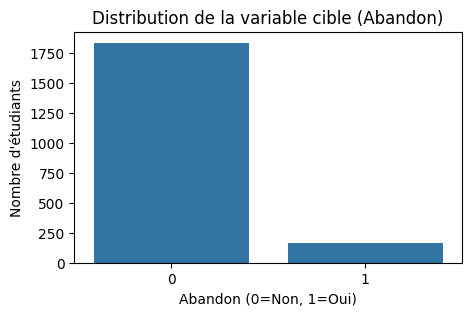

In [18]:
# 2. Distribution de la variable cible
plt.figure(figsize=(5, 3))
sns.countplot(x='Abandon', data=df_clean)
plt.title("Distribution de la variable cible (Abandon)")
plt.xlabel("Abandon (0=Non, 1=Oui)")
plt.ylabel("Nombre d'étudiants")
plt.show()

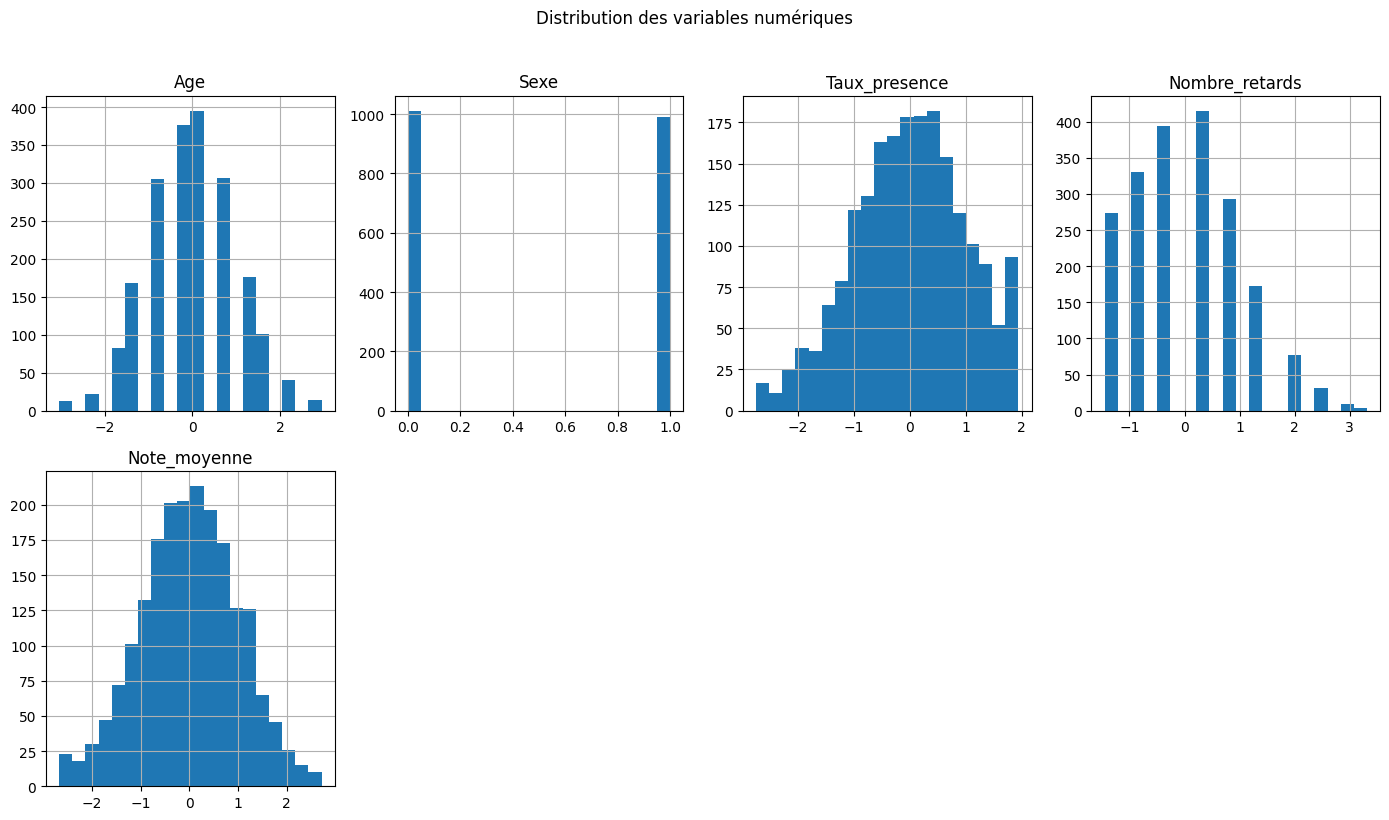

In [19]:
# 3. Visualisation de la distribution des variables numériques (histogrammes)
df_clean.drop(columns='Abandon').hist(bins=20, figsize=(14,8), layout=(2, 4))
plt.suptitle('Distribution des variables numériques', y=1.02)
plt.tight_layout()
plt.show()

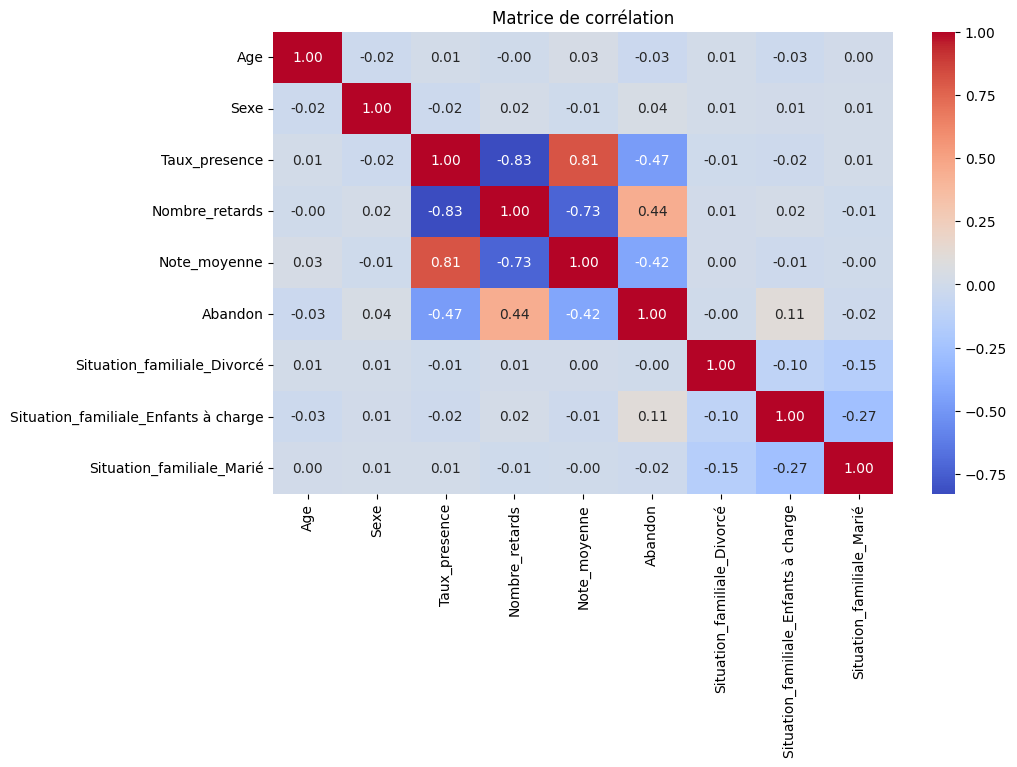

In [20]:
# 4. Analyse des corrélations (matrice de corrélation)
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

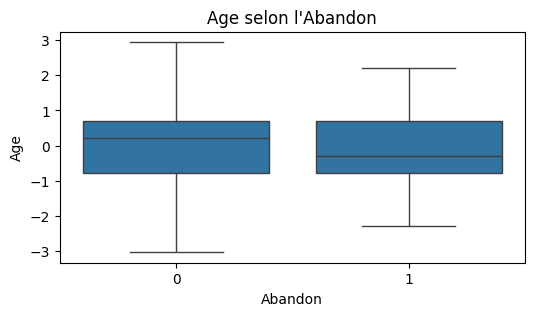

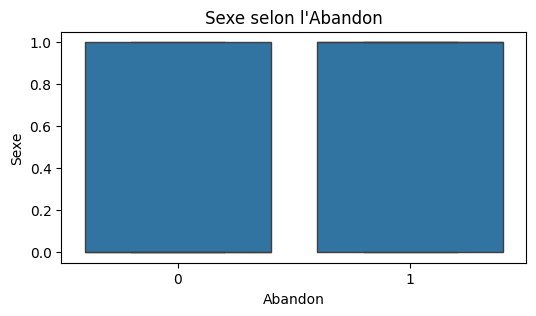

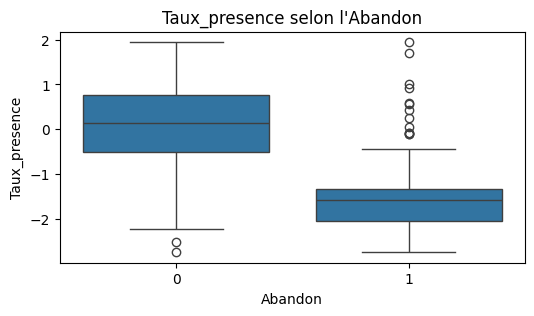

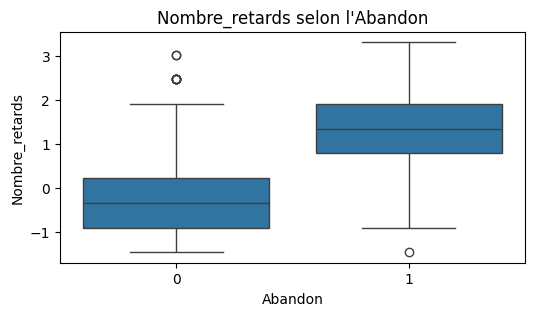

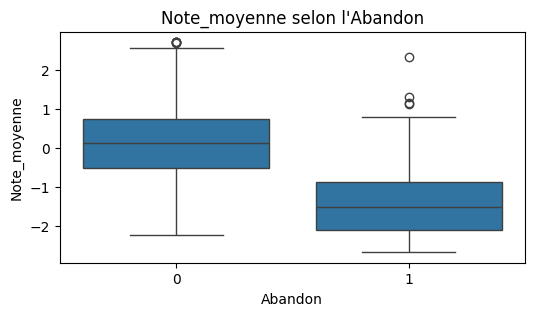

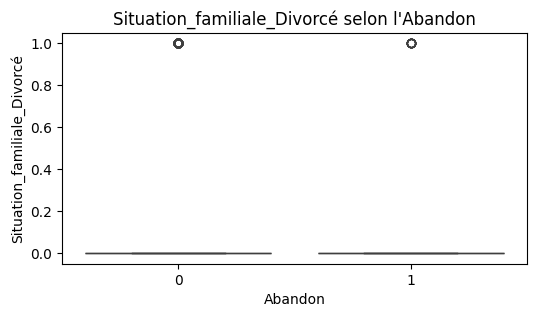

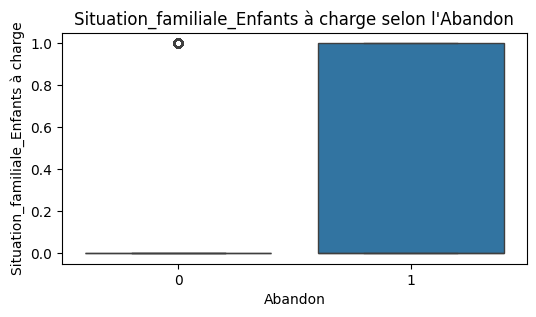

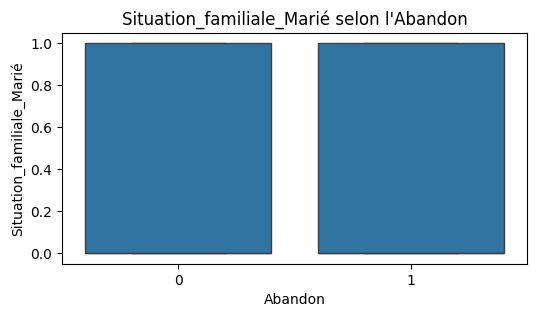

In [21]:

# 5. Analyse des variables explicatives en fonction de la cible
num_features = [col for col in df_clean.columns if col not in ['Abandon']]
for col in num_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Abandon', y=col, data=df_clean)
    plt.title(f"{col} selon l'Abandon")
    plt.show()

In [22]:
# 6.  Analyse des features issues du one-hot encoding
one_hot_cols = [col for col in df_clean.columns if col.startswith("Situation_familiale_")]
for col in one_hot_cols:
    taux = df_clean.groupby(col)['Abandon'].mean()
    print(f"Taux d'abandon pour {col} :")
    print(taux, '\n')

Taux d'abandon pour Situation_familiale_Divorcé :
Situation_familiale_Divorcé
False    0.084261
True     0.079646
Name: Abandon, dtype: float64 

Taux d'abandon pour Situation_familiale_Enfants à charge :
Situation_familiale_Enfants à charge
False    0.071260
True     0.155629
Name: Abandon, dtype: float64 

Taux d'abandon pour Situation_familiale_Marié :
Situation_familiale_Marié
False    0.086774
True     0.077058
Name: Abandon, dtype: float64 



In [24]:
# Corrélation avec la cible (abandon)
correlation_with_target = df_clean.corr()['Abandon'].sort_values(ascending=False)
print("Corrélation des variables avec la cible 'Abandon':\n", correlation_with_target, "\n")

Corrélation des variables avec la cible 'Abandon':
 Abandon                                 1.000000
Nombre_retards                          0.443935
Situation_familiale_Enfants à charge    0.108902
Sexe                                    0.039384
Situation_familiale_Divorcé            -0.003841
Situation_familiale_Marié              -0.015820
Age                                    -0.029108
Note_moyenne                           -0.422772
Taux_presence                          -0.471164
Name: Abandon, dtype: float64 



# **Analyse des corrélations**

**Variables corrélées à l’abandon **:

Taux_presence : corrélation négative forte (-0.47)
→ Moins un étudiant est présent, plus le risque d’abandon est élevé.

Nombre_retards : corrélation positive modérée (+0.44)
→ Plus un étudiant est en retard, plus il risque d’abandonner.

Note_moyenne : corrélation négative modérée (-0.42)
→ Les étudiants ayant de moins bonnes notes abandonnent plus.

**Variables peu corrélées à l’abandon :**

Age, Sexe et les situations familiales ont des corrélations faibles ou très faibles (inférieures à ±0.15).

Sauf Situation_familiale_Enfants à charge, qui double presque le taux d’abandon (de ~7% à 15%).

Corrélations entre variables explicatives :

Taux_presence et Nombre_retards sont fortement négativement corrélés (-0.83) : moins on est présent, plus on a de retards, ce qui est cohérent.

Taux_presence et Note_moyenne sont fortement positivement corrélés (+0.81) : plus on est présent, meilleures sont les notes.

** Analyse par catégories **
Situation familiale :

Les étudiants avec enfants à charge ont un taux d’abandon nettement supérieur.

Pas de différence majeure pour « Divorcé » ou « Marié » par rapport à la population générale.

Sexe :

La variable n’a que très peu d’effet sur l’abandon (corrélation quasi nulle).

## **Analyse en Composantes Principales (PCA)**

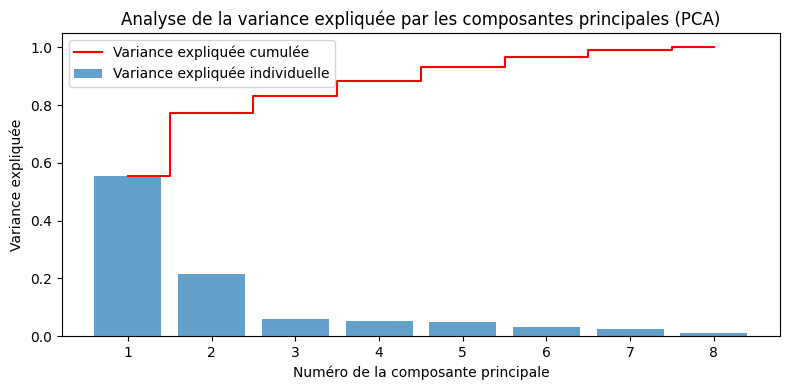

Variance expliquée individuelle par composante :
Composante 1: 55.57%
Composante 2: 21.58%
Composante 3: 5.96%
Composante 4: 5.38%
Composante 5: 4.82%
Composante 6: 3.22%
Composante 7: 2.42%
Composante 8: 1.06%

Variance expliquée cumulée :
Jusqu'à la composante 1: 55.57%
Jusqu'à la composante 2: 77.15%
Jusqu'à la composante 3: 83.11%
Jusqu'à la composante 4: 88.49%
Jusqu'à la composante 5: 93.31%
Jusqu'à la composante 6: 96.53%
Jusqu'à la composante 7: 98.94%
Jusqu'à la composante 8: 100.00%


In [31]:
# On suppose que df_clean a déjà été préparé
X = df_clean.drop('Abandon', axis=1)

# On ajuste la PCA pour obtenir toutes les composantes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

# 1. Visualisation du pourcentage de variance expliquée par chaque composante
plt.figure(figsize=(8,4))
plt.bar(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_, alpha=0.7, label='Variance expliquée individuelle')
plt.step(range(1, len(pca_full.explained_variance_ratio_)+1), np.cumsum(pca_full.explained_variance_ratio_), where='mid', label='Variance expliquée cumulée', color='red')
plt.xlabel("Numéro de la composante principale")
plt.ylabel("Variance expliquée")
plt.title("Analyse de la variance expliquée par les composantes principales (PCA)")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Affichage des résultats numériques principaux
print("Variance expliquée individuelle par composante :")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"Composante {i+1}: {var:.2%}")

print("\nVariance expliquée cumulée :")
for i, var in enumerate(np.cumsum(pca_full.explained_variance_ratio_)):
    print(f"Jusqu'à la composante {i+1}: {var:.2%}")

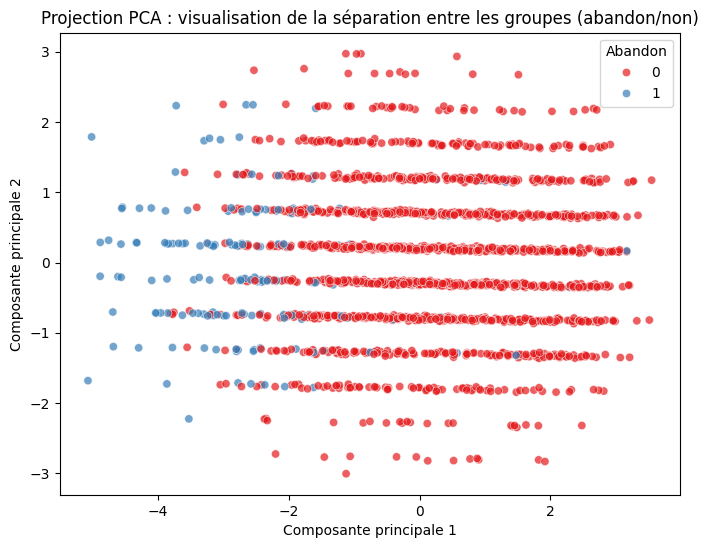

Variance expliquée par les 2 premières composantes : 77.15%


In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', alpha=0.7)
plt.title("Projection PCA : visualisation de la séparation entre les groupes (abandon/non)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()
# Analyse de la variance expliquée
explained_var = pca.explained_variance_ratio_
print(f"Variance expliquée par les 2 premières composantes : {explained_var.sum():.2%}")

# Interprétation de la variance expliquée par les composantes principales
**1. Variance expliquée individuelle**
Composante 1 : explique 55,57% de la variance totale du jeu de données.

Composante 2 : explique 21,58% supplémentaire.

Ensemble, les deux premières composantes expliquent 77,15% de la variance totale.

Les composantes suivantes (3 à 8) expliquent chacune de moins en moins de variance (moins de 6% chacune).

**2. Variance expliquée cumulée**
À partir de la 3<sup>e</sup> composante, on atteint déjà plus de 83% de la variance cumulée.

Avec les 5 premières composantes, on explique plus de 93% de la variance.

La totalité de l’information (100%) est atteinte avec les 8 composantes (correspondant à toutes les variables d’origine).

**Visualisation de la projection PCA**
Le nuage de points issu de la projection sur les deux premières composantes principales montre comment les étudiants sont répartis en fonction de ces deux axes, qui synthétisent la majeure partie de l’information du jeu de données.

La variance expliquée par ces deux composantes est de 77,15% : cela signifie que la majorité des informations contenues dans toutes les variables du dataset est “résumée” par ces deux dimensions.

Lecture du graphe
Points rouges : étudiants n’ayant pas abandonné (classe 0)

Points bleus : étudiants ayant abandonné (classe 1)

Observation
Il n’y a pas de séparation nette ou de “cluster” parfaitement distinct entre les deux groupes.

Les abandons sont dispersés au sein du nuage principal.

Cela indique que la discrimination entre les deux classes n’est pas triviale sur deux axes principaux – le phénomène d’abandon scolaire résulte probablement d’une combinaison plus complexe de plusieurs facteurs.

Synthèse et impact pour la suite
Ce que nous apprend l’ACP
Deux dimensions (axes principaux) suffisent à résumer 77% de l’information.

Cependant, la visualisation n’indique pas une frontière simple ou naturelle pour séparer les élèves qui abandonnent de ceux qui restent.

Il n’y a pas de “cluster” très marqué pour la classe des abandons.

Certaines variables sont donc très corrélées, ce qui explique la forte variance captée par les deux premières composantes.

In [38]:
# 1. Séparation features / target
X = df_clean.drop('Abandon', axis=1)
y = df_clean['Abandon']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [39]:
# 3. Définition des modèles et des grilles d'hyperparamètres
models = {
    'LogisticRegression': (LogisticRegression(solver='liblinear'), {'C':[0.01,0.1,1,10], 'penalty':['l1','l2']}),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), {'max_depth':[2,4,6,8,10], 'min_samples_leaf':[1,3,5]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors':[3,5,7,9], 'weights':['uniform','distance']})
}

results = {}

In [41]:
# 4. GridSearchCV avec validation croisée stratifée
for name, (model, params) in models.items():
    print(f"\n--- {name} ---")
    grid = GridSearchCV(model, params, cv=StratifiedKFold(5), scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print("Best parameters:", grid.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))

    results[name] = {
        "best_estimator": best_model,
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }


--- LogisticRegression ---
Best parameters: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.945
Recall: 0.56
Precision: 0.717948717948718
F1-score: 0.6292134831460674
Confusion matrix:
 [[539  11]
 [ 22  28]]
              precision    recall  f1-score   support

           0      0.961     0.980     0.970       550
           1      0.718     0.560     0.629        50

    accuracy                          0.945       600
   macro avg      0.839     0.770     0.800       600
weighted avg      0.941     0.945     0.942       600


--- DecisionTree ---
Best parameters: {'max_depth': 2, 'min_samples_leaf': 5}
Accuracy: 0.94
Recall: 0.88
Precision: 0.5945945945945946
F1-score: 0.7096774193548387
Confusion matrix:
 [[520  30]
 [  6  44]]
              precision    recall  f1-score   support

           0      0.989     0.945     0.967       550
           1      0.595     0.880     0.710        50

    accuracy                          0.940       600
   macro avg      0.792     0.913     0.838    

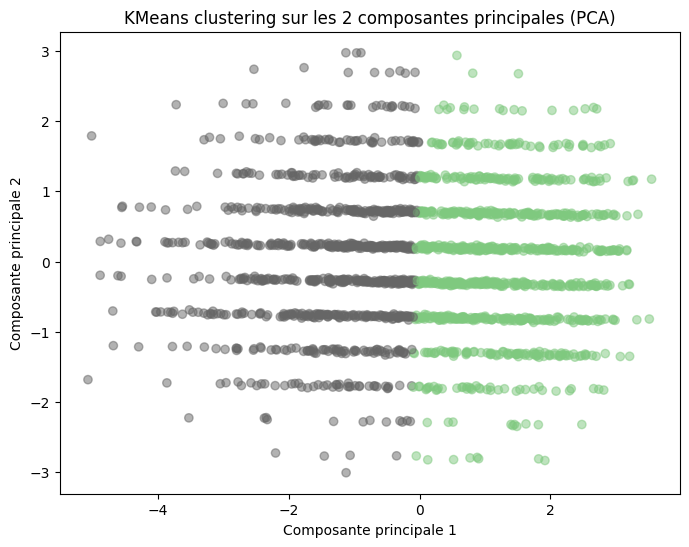

In [45]:
# 5.  KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Accent', alpha=0.5)
plt.title('KMeans clustering sur les 2 composantes principales (PCA)')
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

**1. Synthèse des résultats des modèles supervisé**


       | Modèle                 | Accuracy | Recall | Precision | F1-score |


       
| **LogisticRegression**  | 0.945    | 0.56   | 0.72      | 0.63     |

| **DecisionTree**        | 0.94     | 0.88   | 0.60      | 0.71     |

| **KNN**                 | 0.94     | 0.52   | 0.68      | 0.59     |


*Classe minoritaire = étudiants qui abandonnent (support = 50).*

Matrice de confusion
LogisticRegression : 28 vrais positifs / 22 faux négatifs

DecisionTree : 44 vrais positifs / seulement 6 faux négatifs

KNN : 26 vrais positifs / 24 faux négatifs

**2. Analyse critique des résultats**

a) Lien avec l’exploration PCA et KMeans
PCA et KMeans ont montré un fort recouvrement entre les groupes, donc il n’existe pas de frontière naturelle simple pour distinguer les abandons.

Conséquence :

Les modèles simples (linéaires ou à voisinage) comme la régression logistique ou le KNN ont du mal à capturer tous les abandons (rappel faible, 0.56 et 0.52).

L’arbre de décision, même peu profond, arrive à capturer 88% des abandons (rappel élevé) en acceptant plus de faux positifs (précision modérée).

**b) Interprétation des métriques**
Accuracy élevée pour tous, car la classe majoritaire (pas d’abandon) est prédite sans difficulté.

Recall (sensibilité) est la métrique clé ici :

DecisionTree détecte presque tous les abandons (rappel 0.88), ce qui est fondamental pour ne pas rater d’étudiants à risque.

Précision : l’arbre de décision a une précision plus faible (0.60), ce qui signifie plus de “faux alertes”, mais c’est le compromis à faire pour éviter les abandons non détectés.

F1-score : met en avant le meilleur équilibre : ici, encore l’arbre de décision (0.71).

**c) Importance du choix métier**
Dans un contexte éducatif, mieux vaut prévenir trop d’étudiants que pas assez. Accepter quelques faux positifs est moins grave que de rater des cas réels d’abandon.

La modélisation supervise la recommandation d’interventions humaines, donc on préfère le rappel élevé.

**3. Lecture par modèle**
Régression logistique
Point fort : très bonne précision, interprétable.

Limite : ne détecte que 56% des vrais abandons.

Raison : la séparation linéaire ne suffit pas (confirmé par PCA).

Arbre de décision
Point fort : excellent rappel (88%), bonne capacité à modéliser la non-linéarité, facile à expliquer.

Limite : plus de faux positifs, précision plus faible, mais c’est un choix métier justifié.

Raison : capte les interactions complexes révélées par l’exploration des données.

**KNN**
Point fort : méthodologie simple, souvent performante si structure locale.

Limite : Rappel le plus faible, ce qui confirme que la similarité globale ne suffit pas dans ce dataset (fort recouvrement vu en PCA/KMeans).

**4. Recommandation opérationnelle**
Pour l’usage métier, l’arbre de décision est à privilégier : il offre le meilleur compromis, maximise la détection des abandons (sensibilité/rappel), au prix de quelques interventions inutiles (faux positifs), ce qui est acceptable.

À surveiller : ajuster la profondeur, la taille des feuilles pour ne pas trop sur-apprendre (ici, la profondeur max = 2, donc modèle simple et robuste).

**5. Ouverture & amélioration possible**
Tester des ensembles (RandomForest, boosting) pour éventuellement améliorer la précision sans sacrifier le rappel.

Analyser les variables les plus importantes dans l’arbre de décision (feature importance) pour affiner les stratégies pédagogiques.

**Résumé : **

L’arbre de décision est le modèle le plus pertinent dans ce contexte, grâce à son rappel élevé, en cohérence avec la structure complexe détectée par PCA et KMeans.

La stratégie adoptée maximise la détection des élèves à risque, ce qui est la priorité métier.

In [52]:
# Pour l’ensemble du dataset
X_num_scaled = X_test[num_cols]
X_num_original = scaler.inverse_transform(X_num_scaled)
X_test_original = X_test.copy()
X_test_original[num_cols] = X_num_original

# Pour les observations classées à risque d'abandon
pred_abandon = (y_pred == 1)
at_risk_original = X_test_original[pred_abandon]
print("Aperçu des profils à risque selon le modèle (variables d'origine) :")
print(at_risk_original.head())

Aperçu des profils à risque selon le modèle (variables d'origine) :
       Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
1147  18.0     1      65.877565             5.0     10.576488   
609   23.0     1      64.742031             7.0     11.226908   
914   20.0     1      73.512724             5.0     11.609628   
1978  19.0     0      66.437475             5.0     11.649454   
345   21.0     1      67.982181             6.0     10.642926   

      Situation_familiale_Divorcé  Situation_familiale_Enfants à charge  \
1147                        False                                 False   
609                         False                                 False   
914                         False                                  True   
1978                        False                                 False   
345                          True                                 False   

      Situation_familiale_Marié  
1147                       True  
609                   

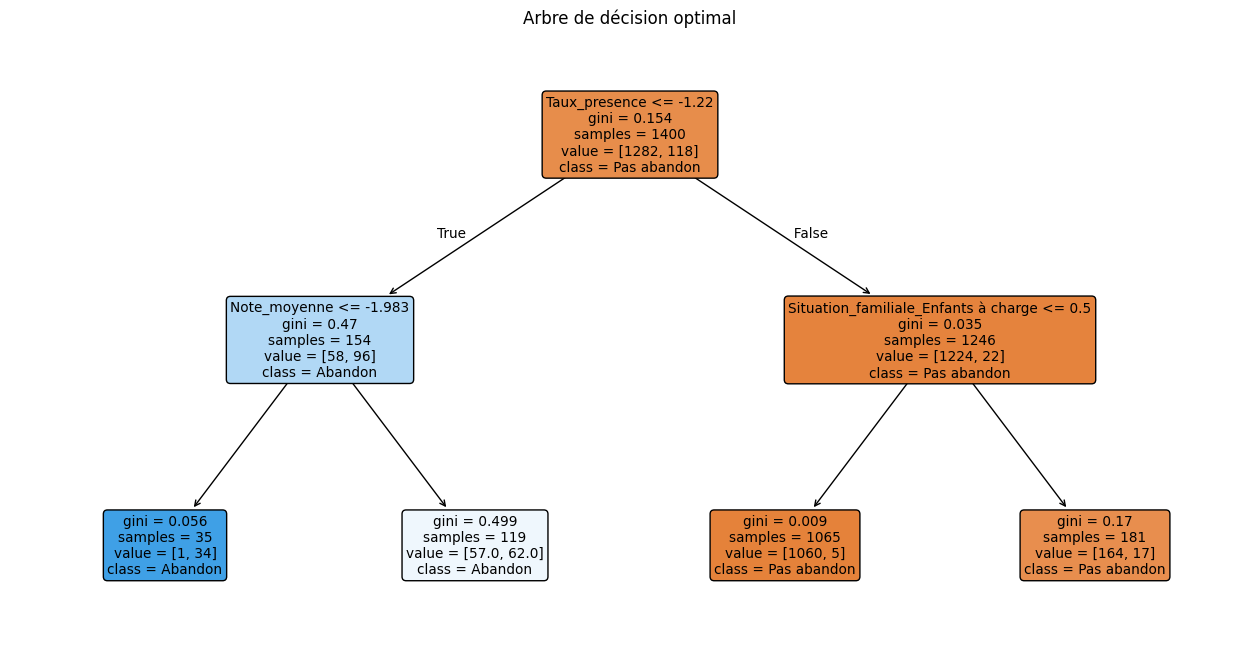

In [56]:
plt.figure(figsize=(16,8))
plot_tree(results['DecisionTree']['best_estimator'],
          feature_names=X.columns,
          class_names=['Pas abandon','Abandon'],
          filled=True, rounded=True)
plt.title("Arbre de décision optimal")
plt.show()

In [59]:

def print_decision_paths(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    paths = []
    def recurse(node, path, threshold_path):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node],
                    path + [f"{name} <= {threshold:.2f}"], threshold_path + [threshold])
            recurse(tree_.children_right[node],
                    path + [f"{name} > {threshold:.2f}"], threshold_path + [threshold])
        else:
            proba = tree_.value[node][0] / tree_.value[node][0].sum()
            pred_class = class_names[np.argmax(proba)]
            paths.append((path, pred_class, proba))
    recurse(0, [], [])
    return paths

# Utilisation :
paths = print_decision_paths(results['DecisionTree']['best_estimator'], list(X.columns), ['Pas abandon','Abandon'])

# Affichage des chemins qui mènent à "Abandon"
print("Règles menant à la prédiction Abandon :")
for p, cls, prob in paths:
    if cls == 'Abandon':
        print("ET ".join(p), f"=> Proba : {prob[1]:.2f}")

Règles menant à la prédiction Abandon :
Taux_presence <= -1.22ET Note_moyenne <= -1.98 => Proba : 0.97
Taux_presence <= -1.22ET Note_moyenne > -1.98 => Proba : 0.52


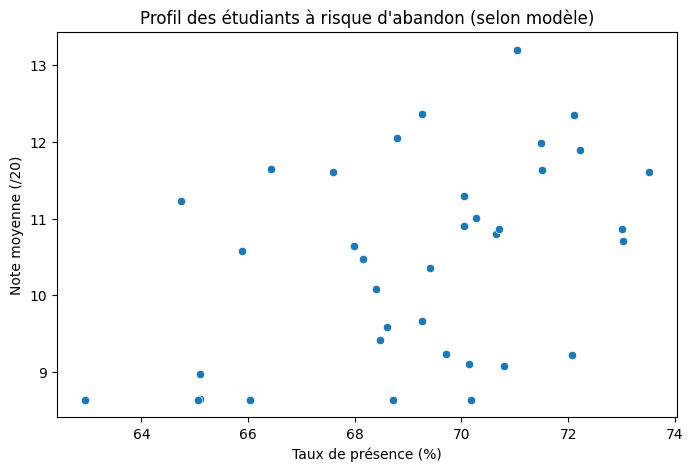

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=at_risk_original, x='Taux_presence', y='Note_moyenne')
plt.title("Profil des étudiants à risque d'abandon (selon modèle)")
plt.xlabel("Taux de présence (%)")
plt.ylabel("Note moyenne (/20)")
plt.show()

In [67]:
def recup_situation_familiale(row):
    if row.get('Situation_familiale_Divorcé', 0) == 1:
        return "Divorcé"
    elif row.get('Situation_familiale_Enfants à charge', 0) == 1:
        return "Enfants à charge"
    elif row.get('Situation_familiale_Marié', 0) == 1:
        return "Marié"
    else:
        return "Célibataire"

at_risk_original['Situation_familiale'] = at_risk_original.apply(recup_situation_familiale, axis=1)


<ipython-input-67-4e28d53bea01>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_original['Situation_familiale'] = at_risk_original.apply(recup_situation_familiale, axis=1)


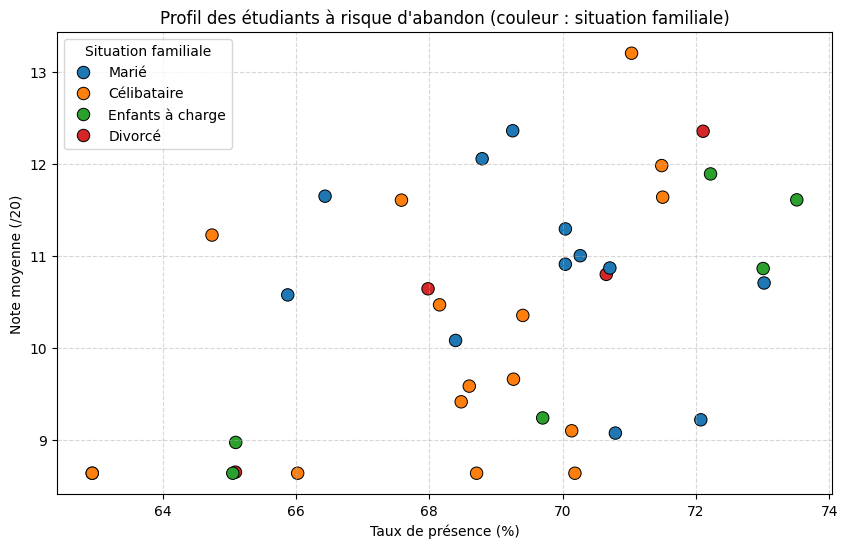

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=at_risk_original,
    x='Taux_presence',
    y='Note_moyenne',
    hue='Situation_familiale',
    palette='tab10',
    s=80,
    edgecolor="k"
)
plt.title("Profil des étudiants à risque d'abandon (couleur : situation familiale)")
plt.xlabel("Taux de présence (%)")
plt.ylabel("Note moyenne (/20)")
plt.legend(title="Situation familiale")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


#  Analyse critique approfondie des résultats
**1. Identification du meilleur modèle**
Le meilleur modèle sélectionné est l’arbre de décision.

Pourquoi surpasse-t-il les autres ?
Qualité des prédictions :

Rappel (Recall) de 88 % sur la classe “abandon”, donc le modèle identifie la grande majorité des étudiants à risque (critère principal dans le contexte métier).

Précision acceptable (60 %) : une partie des alertes sont des “faux positifs”, mais dans ce contexte, il est préférable de prévenir trop que pas assez.

Interprétabilité :

Les règles du modèle sont simples et lisibles (“faible taux de présence” + “notes basses” + “enfants à charge”).

Chaque décision peut être explicitée auprès de l’équipe pédagogique, favorisant l’acceptation et l’utilisation du modèle.

Facilité de mise en œuvre :

Pas besoin d’infrastructure complexe, ni de prétraitement lourd.

Le modèle s’adapte facilement à de nouveaux étudiants ou à de nouvelles données.

**2. Limites du modèle**
Biais potentiel des données :

Les prédictions du modèle ne sont valables que dans le contexte et la population étudiés (données collectées sur 2000 étudiants d’une seule structure éducative).

D’éventuels biais d’échantillonnage : si certains profils sont sous-représentés, ils seront moins bien détectés.

Sur-apprentissage (overfitting) :

Limité ici grâce à la faible profondeur de l’arbre, mais la performance réelle sur d’autres promotions devra être vérifiée.

Qualité des données :

Seules les variables collectées sont exploitées. D’autres facteurs non mesurés (motivation, conditions de vie, soutien social) peuvent jouer un rôle, donc la couverture du risque n’est pas exhaustive.

**3. Analyse des métriques obtenues**
Faux positifs : étudiants signalés à risque mais qui n’abandonnent pas.

Impact métier : coût “acceptable”, car cela génère de la vigilance ou de l’accompagnement supplémentaire, mais sans risque grave.

Faux négatifs : étudiants non détectés à risque mais qui abandonnent réellement.

Impact métier : beaucoup plus problématique, car ce sont des cas “ratés” par la prévention.

Le modèle limite ce risque (rappel élevé), mais il n’est pas nul.

Précision globale :

Si la précision est élevée : la majorité des alertes émises correspondent à de vrais abandons, ce qui limite les interventions inutiles.

Si la précision est faible : plus d’interventions “inutiles”, mais le rappel reste la métrique clé.

Implications opérationnelles
Il vaut mieux accepter un excès d’alertes (faux positifs) que de rater des étudiants en difficulté (faux négatifs).

Le modèle doit donc être considéré comme un outil de priorisation, pas de décision définitive : il aide à concentrer les efforts, mais ne remplace pas l’expertise pédagogique.

**4. Interprétation métier de la précision**
Une précision élevée signifie que le personnel ne va pas “épuiser” ses ressources sur des étudiants qui ne sont pas à risque. Mais la priorité métier est d’éviter les faux négatifs (abandon non détecté).

Une précision trop faible pourrait entraîner une surcharge de travail des équipes, voire une désensibilisation face aux alertes, mais ce risque reste modéré comparé à la valeur ajoutée d’un rappel élevé.

# Restitution claire et actionable pour le métier
1. Rapport synthétique avec visuels explicatifs
Un schéma de l’arbre de décision expliquant les principaux critères de détection.

Un graphique des profils à risque (taux de présence vs note, couleur = situation familiale).

Des indicateurs clés (nombre d’étudiants détectés, taux d’alerte, répartition par catégorie).

Exemple de visuel à présenter :
“Voici le type d’étudiant prioritairement à risque selon le modèle : taux de présence < 70 %, note moyenne < 11/20, enfants à charge.”

Liste des étudiants identifiés, avec pour chacun les valeurs des critères déterminants.